In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [4]:
# df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/data.csv")

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# drop the unnecessary columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [8]:
#target --> diagnosis
# separate input and output
X = df.drop(columns='diagnosis')
y = df['diagnosis']

y = y.map({"M":0,"B":1}) # manual method for custom encoding

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

X_train_transform = ss.fit_transform(X_train) 
X_test_transform = ss.transform(X_test) 

In [ ]:
#transform --> X_test - (mean of training data)/(std of training data)
# fit_transform --> X_test - (mean of test data)/(std of test data)

In [9]:
X_train_transform.shape

(398, 30)

In [12]:
for i in range(X_train_transform.shape[1]):
    pca = PCA(n_components=i+1)
    X_train_pca = pca.fit_transform(X_train_transform)
    if np.sum(pca.explained_variance_ratio_) > 0.9:
        break

In [13]:
pca.n_components_

7

In [14]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_transform)

In [15]:
X_train_pca.shape

(398, 7)

In [16]:
X_test_transform.shape

(171, 30)

In [17]:
X_test_pca = pca.transform(X_test_transform)

In [18]:
X_test_pca.shape

(171, 7)

In [19]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_pca,y_train)

GaussianNB()

In [20]:
y_pred = naive_bayes.predict(X_test_pca)

from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.9259259259259259

In [ ]:
# https://www.oreilly.com/library/view/introducing-mlops/9781492083283/

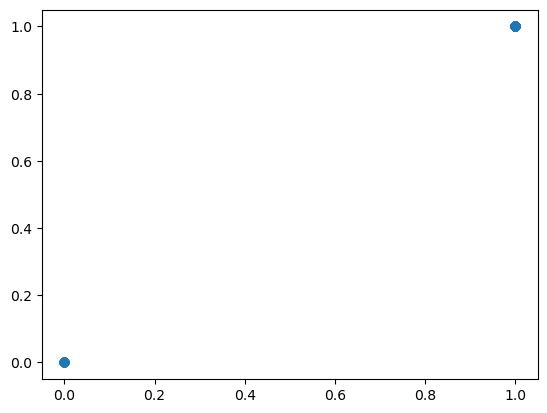

In [21]:
plt.scatter(y_test,y_test)